# Import the libraries that will be needed for this task.

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.svm import SVC



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# reading the dataset and display the top 10
airline_tweter_data = pd.read_csv("Tweets.csv")
airline_tweter_data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [3]:
airline_tweter_data['airline_sentiment']

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

Let's explore the dataset a bit to see if we can find any trends. But before that, we will change the default plot size to have a better view of the plots.

Exploration Of Data

Let's first see the number of tweets for each airline. We will plot a pie chart for that:

In [4]:
# set one size for all plots 

plt.rcParams["figure.figsize"] = (10,6)


# let's Perform a comprehensive Exploratory Data Analysis on the dataset.

<AxesSubplot:ylabel='airline'>

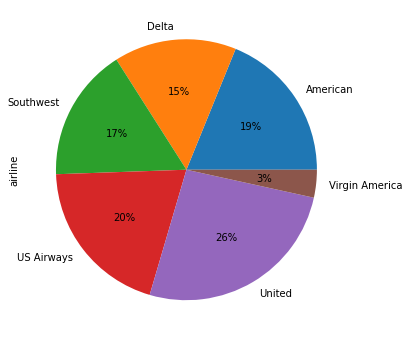

In [5]:
#airline_tweter_data.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

airline_tweter_data.airline.str.get_dummies().sum().plot.pie(label='airline', autopct='%1.0f%%')

The percentage of public tweets for each airline is represented in the above pie chart. United Airlines has the most tweets 26% and US Airways has the second-most 20% while Virgin America has a lower proportion of public tweets with 3%.

# Let's now see the distribution of sentiments across all the tweets.

<AxesSubplot:ylabel='airline_sentimental'>

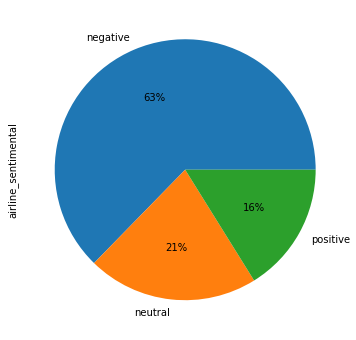

In [6]:
# airline_tweter_data.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

airline_tweter_data.airline_sentiment.str.get_dummies().sum().plot.pie(label='airline_sentimental', autopct='%1.0f%%')

According to the graph above, 63% of tweets regarding US airlines are negative, while 16 and 21 percent are positive and neutral.

<AxesSubplot:xlabel='airline'>

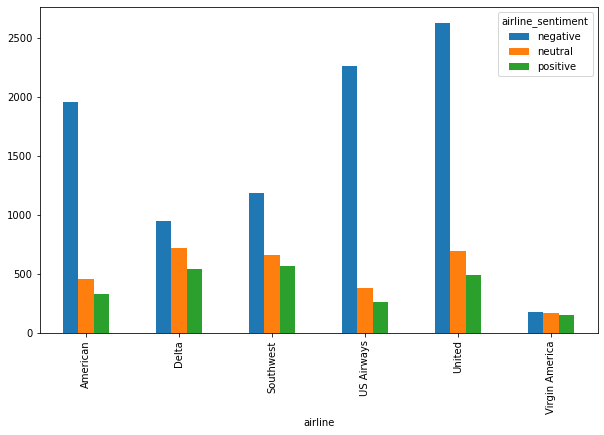

In [7]:
airline_sentiment = airline_tweter_data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
#airline_sentiment
airline_sentiment.plot(kind='bar')

#airline_sentiment.plot(kind='bar',y='airline_sentiment')

The graph displayed for most airlines shows that the majority of tweets are negative, followed by neutral, and positive is the lowest value, but Virgin America stands out by having nearly identical sentimental values.  

let's view the average confidence level for the tweets belonging to three sentiment categories.

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

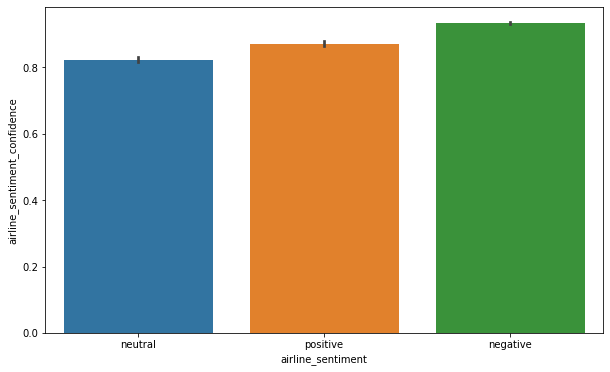

In [8]:

sns.barplot(x = 'airline_sentiment',y = 'airline_sentiment_confidence', data = airline_tweter_data )



According to the result for airline sentiment confidence, negative sentiment is the most predominant when compared to neutral and positive sentiment.

# Data Cleaning

meaningless words appear in tweets. Before we can train the machine learning model, we need to clean up our tweets.
Let us separate our dataset into feature and label sets before cleaning the tweets.

Tweets content can be found on the 11th column index, whereas sentiment labels can be found on the 1st column index from the dataset.

In [9]:
features = airline_tweter_data.iloc[:, 10].values
labels = airline_tweter_data.iloc[:, 1].values


Once we divide the data into features and training set, we can preprocess data in order to clean it.

In [10]:
#To remove noisy data from our features(tweets), we apply regular expressions.
processing_features = []

for words in range(0, len(features)):
    # To begin, all special characters in tweets are removed. re.sub(r'W',", str(features[sentence]) does this.
    processing_feature = re.sub(r'\W', ' ', str(features[words]))

    #Using the re.sub(r's+[a-zA-Z]s+',", processed feature) regular expression, we delete all single characters that remain after deleting the special character. For example, if we substitute the special character'with a space, we get Jack s. Because the letter s has no meaning here, we replace it with a space.
    processing_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processing_feature)

    # Remove single characters from the start
    processing_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processing_feature) 

    # When we replace all single characters with spaces, we get multiple spaces. As a result, we use the re.sub(r's+',", processed feature, flags=re.I) regex to replace all the multiple spaces with single spaces.
    processing_feature = re.sub(r'\s+', ' ', processing_feature, flags=re.I)

    # A character b is inserted to the end of your text string if it is in bytes format. re.sub(r'bs+', ", processed feature) can be used to delete it.
    processing_feature = re.sub(r'^b\s+', '', processing_feature) #Stemming 

    # The lower() function is used to convert the text to lowercase.
    processing_feature = processing_feature.lower()
    
    #to an empty list, attach the processed features
    processing_features.append(processing_feature)


In order to train machine learning models, statistical algorithms are used. Mathematics, on the other hand, only work with numbers. We must first transform text to numbers in order to use statistical algorithms with text. We'll apply TF-IDF methods to accomplish this.

# TF-IDF

TF-IDF is a word that combines two terms. Inverse Document Frequency and Term Frequency They may be calculated using the following formula:

TF = (Word Frequency in the Document)/ (Total words in the document)

IDF = Log((Total number of documents)/(Number of documents that contain the word))

# Using the Scikit-Learn Library to create a TF-IDF

The TfidfVectorizer class in Python's Scikit-Learn module can be used to convert text features into TF-IDF feature vectors.

In [11]:
# vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
# processing_features = vectorizer.fit_transform(processing_features).toarray()

In [12]:


vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processing_features) #.toarray()

# Dividing Data into Training and Test Sets
Our data must be divided into training and testing sets. The training set will be used to train the algorithm, and the test set will be used to evaluate the machine learning model's performance.

In [13]:
# Our test size parameter was set to 0.2, which means that our data set will be divided into two groups, each with 80% and 20% of the data. For training, we'll use 80% of the dataset, and for testing, we'll use 20%.
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

# Implementing RandomForestClassifier algorithm

# TO train the model
The RandomForestClassifier class in the sklearn.ensemble module can be used to train machine learning models using the random forest algorithm. To do so, we must use the RandomForestClassifier class's fit method and feed it our training features and labels as parameters.

In [14]:

words_classifier = RandomForestClassifier(n_estimators=250, random_state=0)
words_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=0)

# Make the Prediction

In [15]:
#The final phase is to make predictions on the model after it has been trained. To do so, we must use the predict() function on the RandomForestClassifier class object that we used for training.
prediction = words_classifier.predict(X_test)

# Evaluating the model

In [16]:
#Finally, classification measures such as a confusion metrix and accuracy can be used to assess the performance of machine learning models.

print(confusion_matrix(y_test,prediction),'\n')


print('accuracy score',accuracy_score(y_test, prediction))


[[1723  107   40]
 [ 325  248   41]
 [ 134   58  252]] 

accuracy score 0.7592213114754098


# Implementing LogisticRegression algorithm

# Training the Algorithm

In [17]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)

# Making Predictions

In [18]:
y_pred_lr = LR.predict(X_test)


# Evaluating the model

In [19]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred_lr))


Accuracy score: 0.7793715846994536


# Implementing SVM algorithm

# Training the Algorithm

In [20]:

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

# Making Predictions
To make predictions, the predict method of the SVC class is used.

In [21]:
y_pred_svc = svclassifier.predict(X_test)


# Evaluating the Algorithm

In [22]:

print('accuracy score',accuracy_score(y_test, y_pred_svc))



accuracy score 0.7800546448087432


In [23]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)